In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd
import matplotlib.pyplot as plt
from math import sqrt


In [ ]:
url = 'https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv'
# the dataset is tab separated
# df = pd.read_csv(url, sep='\t')
# df.head()

data = pd.read_csv(url, sep='\t')
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [ ]:
data.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [ ]:
df = data.to_numpy()
df
ab= df.shape[0]
ab


272

For explaining purpose, we will take two variables from data "ApplicantIncome" and "LoanAmount".

In [ ]:
def z_score(data):
  mean = sum(data.values)/ len(data.values)
  stdDevitaion = (data.values - mean) ** 2
  meanStdDeviation = sum(stdDevitaion) / len(data.values)
  dataNormalised = (data - data.mean())/data.std()
  return dataNormalised

In [ ]:
data = z_score(data)
data.describe()

,eruptions,waiting
count,2.720000e+02,2.720000e+02
mean,4.800082e-16,4.261297e-16
std,1.000000e+00,1.000000e+00
min,-1.653961e+00,-2.052013e+00
25%,-1.160913e+00,-9.486638e-01
50%,4.487733e-01,3.753550e-01
75%,8.467595e-01,8.166946e-01
max,1.412526e+00,1.846487e+00


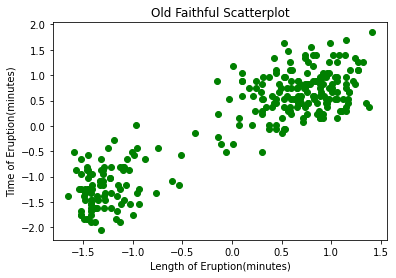

In [ ]:
X = data[["eruptions", "waiting"]]
# Visualize data point
plt.scatter(X["eruptions"], X["waiting"], c="green")
plt.title('Old Faithful Scatterplot')
plt.xlabel('Length of Eruption(minutes)')
plt.ylabel('Time of Eruption(minutes)')
plt.show()

In [ ]:
abc=X.shape[0]
abc

272

Standardizing the data

Steps of K-Means clustering
1. Choose the number of clusters K
2. select K random points from the data as centroid
3. assign each data point to the closet cluster centriod
4. Recompute the centriod of newly formed cluster, next step is to compute the centriod of newly formed clusters
5. repeat steps 3 and 4

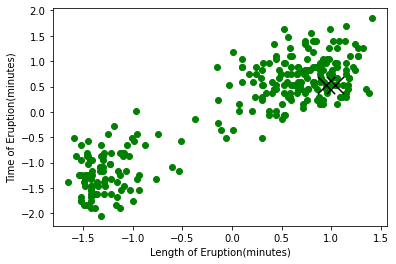

In [ ]:
# step 1 and 2

# number of centriod
K=2

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["eruptions"], X["waiting"], c="green")
plt.scatter(Centroids["eruptions"], Centroids["waiting"], c="black", marker = 'x', s=300)
plt.xlabel('Length of Eruption(minutes)')
plt.ylabel('Time of Eruption(minutes)')
plt.show()

In [ ]:
Centroids

,eruptions,waiting
77,0.945544,0.522468
199,1.033158,0.522468


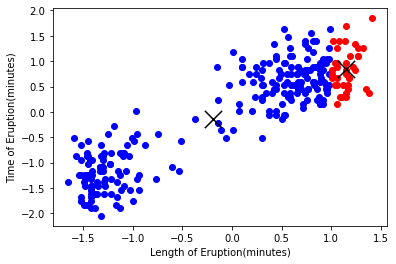

-1.9007679989700368


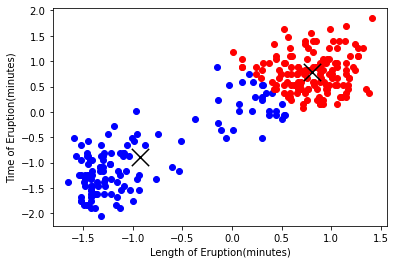

-0.6952064741707771


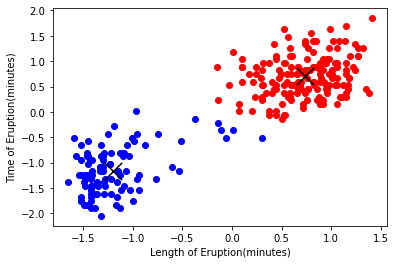

-0.09194744558160473


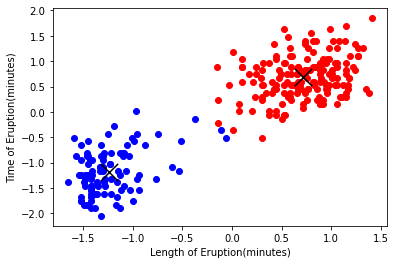

-0.030533037323295487


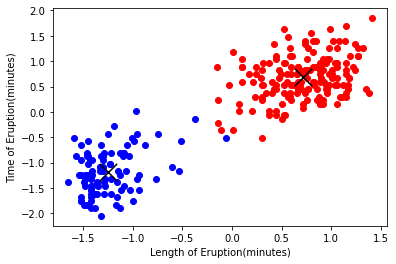

-0.030623049828168325


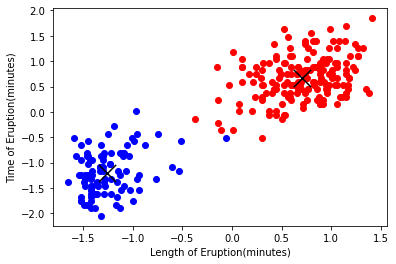

0.0


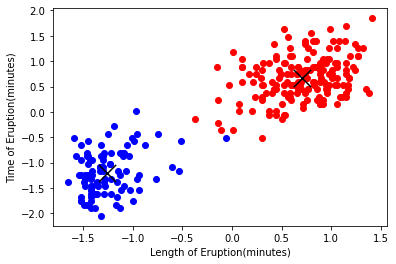

In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0
distortionMeasure = []

while(diff!=0):
    XD=X
    i=1
    
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["eruptions"]-row_d["eruptions"])**2
            d2 = (row_c["waiting"]-row_d["waiting"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    cost = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
            cost.append(min_dist)
        C.append(pos)
    distortion = 0
    for i in cost:
      distortion+=i**2
    distortionMeasure.append(distortion)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["waiting", "eruptions"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['waiting'] - Centroids['waiting']).sum() + (Centroids_new['eruptions'] - Centroids['eruptions']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["waiting","eruptions"]]
  
    color=['blue','red']
    for k in range(K):
        data=X[X["Cluster"]==k+1]
        plt.scatter(data["eruptions"],data["waiting"],c=color[k])
    plt.scatter(Centroids["eruptions"],Centroids["waiting"],c='black',  marker = 'x', s=300)
    plt.xlabel('Length of Eruption(minutes)')
    plt.ylabel('Time of Eruption(minutes)')
    plt.show()

In [ ]:
# Centroids.iterrows()
# for index, row in Centroids.iterrows():
mu = Centroids.to_numpy()
Centroids

,waiting,eruptions
Cluster,,
1,-1.199357,-1.257767
2,0.675500,0.708397


In [ ]:
mu

array([[-1.19935664, -1.25776692],
       [ 0.67549972,  0.70839746]])

In [ ]:
distortionMeasure

[1717.785115315578,
 865.7576585992624,
 1087.511174124851,
 1377.031600745902,
 1416.7871894815803,
 1429.7947716362312,
 1442.8414442669357]

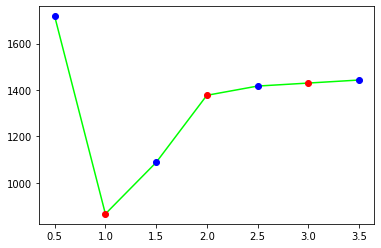

In [ ]:
# distortionMeasure = []
# for i in distortion:
#   distortionMeasure.append(i**2) 
x = [0.5 * i for i in range(1, len(distortionMeasure)+1)]
y = distortionMeasure
x1 = [x[i] for i in range(len(x)) if i % 2 == 0]
x2 = [x[i] for i in range(len(x)) if i % 2 == 1]
y1 = [y[i] for i in range(len(y)) if i % 2 == 0]
y2 = [y[i] for i in range(len(y)) if i % 2 == 1]
plt.plot(x, y, 'lime')
plt.plot(x1, y1, 'bo', x2, y2, 'ro')
